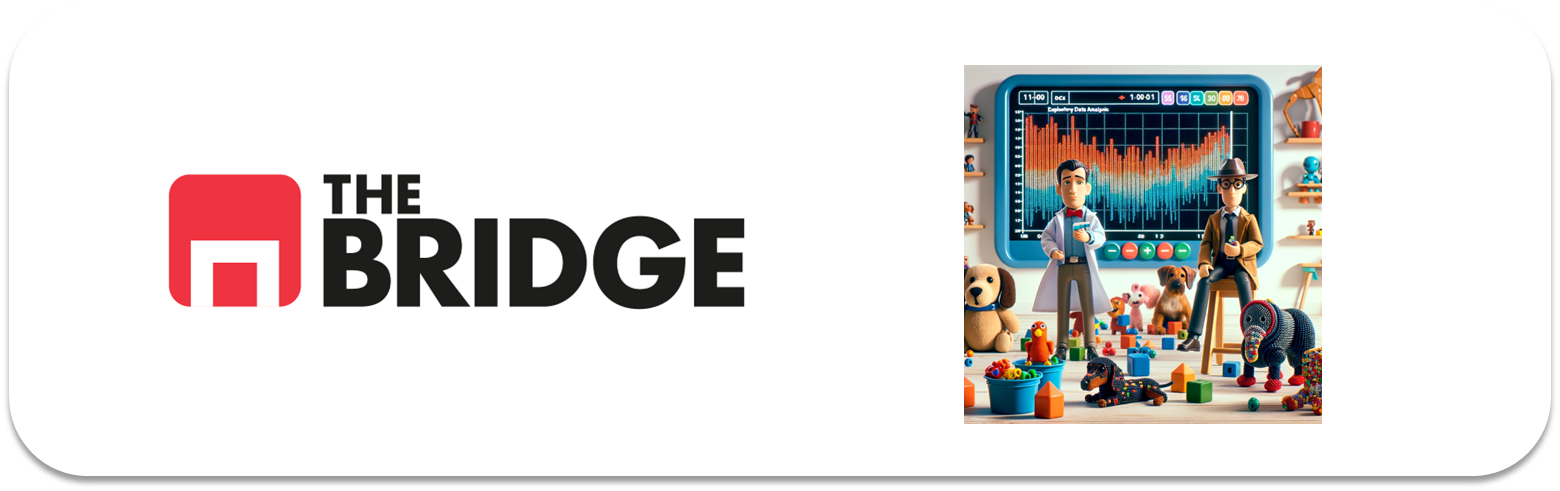

## PRACTICA OBLIGATORIA: ANÁLISIS MULTIVARIANTE

* La práctica obligatoria de esta unidad consiste en completar el análisis del dataset del Titanic, dirigido por una serie de preguntas, y de terminar de analizar algunos aspectos del dataset de viajes. Descarga este notebook en tu ordenador y trabaja en local. Ten en cuenta que tendrás que descar los directorios de imágenes y datos adicionales, si los hubiera.
* Recuerda que debes subirla a tu repositorio personal antes de la sesión en vivo para que puntúe adecuadamente.  
* Recuerda también que no es necesario que esté perfecta, sólo es necesario que se vea el esfuerzo. 
* Esta práctica se resolverá en la sesión en vivo correspondiente y la solución se publicará en el repo del curso. 

### Ejercicio 0


Importa los paquetes y módulos que necesites a lo largo del notebook

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

from bootcampviztools import plot_categorical_numerical_relationship, plot_combined_graphs, \
    pinta_distribucion_categoricas, plot_grouped_boxplots, plot_categorical_relationship_fin, plot_grouped_histograms, \
        grafico_dispersion_con_correlacion, bubble_plot

## #1 TITANIC

### #1.1

Carga en un dataframe el dataset del titanic, que está en la ruta "./data/titanic.csv".

In [3]:
# Cargar el dataset del Titanic
df_titanic = pd.read_csv('./data/titanic.csv')
df_titanic.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True


### #1.2

Deshazte de las columnas "deck", "survived", "pclass" y "embarked" porque no las emplearemos, la primera por su cantidad de nulos y el resto porque son variantes de otras que ya existen y cuyos valores resultan más expresivos a la hora de hacer un análisis. 

In [4]:
# Limpieza de columnas
df_titanic_clean = df_titanic.drop(columns=['survived', 'deck', 'pclass', 'embarked'])
df_titanic_clean.head()

,sex,age,sibsp,parch,fare,class,who,adult_male,embark_town,alive,alone
0,male,22.0,1,0,7.2500,Third,man,True,Southampton,no,False
1,female,38.0,1,0,71.2833,First,woman,False,Cherbourg,yes,False
2,female,26.0,0,0,7.9250,Third,woman,False,Southampton,yes,True
3,female,35.0,1,0,53.1000,First,woman,False,Southampton,yes,False
4,male,35.0,0,0,8.0500,Third,man,True,Southampton,no,True


### #1.3

Suma las columnas "parch" y "sibsp" para tener el número de parientes de cada pasajero, guarda el resultado en otra columna "family_members", luego deshazte de "parch" y "sibsp"

In [5]:
# Sumar las columnas "parch" y "sibsp" para obtener el número de parientes
df_titanic_clean['family_members'] = df_titanic_clean['parch'] + df_titanic_clean['sibsp']

# Eliminar las columnas "parch" y "sibsp"
df_titanic_clean = df_titanic_clean.drop(columns=['parch', 'sibsp'])

df_titanic_clean.head()

,sex,age,fare,class,who,adult_male,embark_town,alive,alone,family_members
0,male,22.0,7.2500,Third,man,True,Southampton,no,False,1
1,female,38.0,71.2833,First,woman,False,Cherbourg,yes,False,1
2,female,26.0,7.9250,Third,woman,False,Southampton,yes,True,0
3,female,35.0,53.1000,First,woman,False,Southampton,yes,False,1
4,male,35.0,8.0500,Third,man,True,Southampton,no,True,0


### #1.4

Imputa la moda a los valores nulos de "embark_town"

In [6]:
# Imputar moda a "embark_town"
df_titanic_clean['embark_town'] = df_titanic_clean['embark_town'].fillna(df_titanic_clean['embark_town'].mode()[0])
df_titanic_clean.head()

,sex,age,fare,class,who,adult_male,embark_town,alive,alone,family_members
0,male,22.0,7.2500,Third,man,True,Southampton,no,False,1
1,female,38.0,71.2833,First,woman,False,Cherbourg,yes,False,1
2,female,26.0,7.9250,Third,woman,False,Southampton,yes,True,0
3,female,35.0,53.1000,First,woman,False,Southampton,yes,False,1
4,male,35.0,8.0500,Third,man,True,Southampton,no,True,0


### #1.5

Imputa la media a los valores faltantes de "age", si quieres puedes hacer algo más preciso (por ejemplo considerando además la columna "who")

In [7]:
# Imputar media a "age"
es_woman = df_titanic_clean.who == "woman"
es_child = df_titanic_clean.who == "child"
es_man = df_titanic_clean.who == "man"

media_woman = df_titanic_clean.loc[es_woman,"age"].mean()
media_child = df_titanic_clean.loc[es_child,"age"].mean()
media_man = df_titanic_clean.loc[es_man,"age"].mean()

es_age_nulo = df_titanic_clean.age.isna()

df_titanic_clean.loc[es_woman & es_age_nulo, "age"] = media_woman
df_titanic_clean.loc[es_child & es_age_nulo, "age"] = media_child
df_titanic_clean.loc[es_man & es_age_nulo, "age"] = media_man

In [8]:
df_titanic_clean.head()

,sex,age,fare,class,who,adult_male,embark_town,alive,alone,family_members
0,male,22.0,7.2500,Third,man,True,Southampton,no,False,1
1,female,38.0,71.2833,First,woman,False,Cherbourg,yes,False,1
2,female,26.0,7.9250,Third,woman,False,Southampton,yes,True,0
3,female,35.0,53.1000,First,woman,False,Southampton,yes,False,1
4,male,35.0,8.0500,Third,man,True,Southampton,no,True,0


### 1.6

Realiza los análisis bivariantes o multivariantes que necesites, así como los test de hipótesis necesarios para contestar a las siguientes preguntas. Nota: utiliza la variable "alive" para saber si un pasajero sobrevivió o no:

1. En términos absolutos, ¿sobrevivieron más hombres, mujeres o niños? ¿Y en términos relativos? ¿Existe alguna relación estadísticamente significativa entre el sexo y la supervivencia en el Titanic?¿Y entre ser adulto o ser niño?

2. En términos absolutos, ¿de que clase sobrevivieron más pasajeros?¿ Y en términos relativos? ¿Existe alguna relación estadísticamente significativa entre la clase en la que se viajaba y la supervivencia?

3. ¿De qué ciudad sobrevivieron más personas?¿Y porcentualmente de que ciudad sobrevivieron más personas? ¿Hay alguna relación estadística significativa entre haber embarcado en una de las tres ciudades y haber sobrevivido o fallecido?

4. ¿Qué relación hay entre el precio del pasaje y la supervivencia/fallecimiento?

5. Existen pasajero que no pagaron el billete, ¿podrías explicar por qué? ¿Qué ocurrió con la persona que más dinero se dejó?

6. Existe alguna relación entre el dinero pagado, la ciudad de embarque y la superviviencia/fallecimiento. No necesitas aplicar ningún test, muestralo numérica o visualmente.

7. Ahondando en la relación entre sobrevivir o fallecer, la clase en la que se viajó y la edad de los pasajeros. ¿Qué agrupación de las dos variables (clase y edad) sobrevivió más en términos absolutos y en términos relativos?

8. Finalmente, muestra las posibles relaciones entre edad, coste del billete y supervivencia/fallecimiento. ¿Qué puedes decir al respecto?

In [33]:
from scipy.stats import chi2_contingency
from scipy.stats import ttest_ind

# 1. En términos absolutos, ¿sobrevivieron más hombres, mujeres o niños? ¿Y en términos relativos?
# ¿Existe alguna relación estadísticamente significativa entre el sexo y la supervivencia en el Titanic? ¿Y entre ser adulto o ser niño?

# Absolutos
survival_counts = df_titanic_clean.groupby(['who', 'alive']).size().unstack()
print(survival_counts)

# Relativos
survival_rates = df_titanic_clean.groupby(['who', 'alive']).size().unstack()
survival_rates = survival_rates.div(survival_rates.sum(axis=1), axis=0)
print("\n",survival_rates)

# Usamos un test de chi-cuadrado para ver si hay relación entre las variables "sex" y "alive"

contingency_table_sex = pd.crosstab(df_titanic_clean['sex'], df_titanic_clean['alive'])
chi2, p, dof, expected = chi2_contingency(contingency_table_sex)
print(f"\nChi-cuadrado para sex y alive: chi2={chi2}, p-value={p}")

# Usamos un test de chi-cuadrado para ver si hay relación entre las variables "who" y "alive"
contingency_table_who = pd.crosstab(df_titanic_clean['who'], df_titanic_clean['alive'])
chi2, p, dof, expected = chi2_contingency(contingency_table_who)
print(f"\nChi-cuadrado para who y alive: chi2={chi2}, p-value={p}")


alive   no  yes
who            
child   34   49
man    449   88
woman   66  205

 alive        no       yes
who                      
child  0.409639  0.590361
man    0.836127  0.163873
woman  0.243542  0.756458

Chi-cuadrado para sex y alive: chi2=260.71702016732104, p-value=1.1973570627755645e-58

Chi-cuadrado para who y alive: chi2=283.923050324233, p-value=2.2227620817798914e-62


**En términos absolutos y relativos, sobrevivieron más mujeres**


**Al aplicar test de chi-cuadrada, se determina que 'alive' tiene una relación estadísticamente significativa entre el sexo y en si era niño o adulto (mujeres y niños primero)**

In [34]:
# 2. En términos absolutos, ¿de que clase sobrevivieron más pasajeros? ¿Y en términos relativos?
# ¿Existe alguna relación estadísticamente significativa entre la clase en la que se viajaba y la supervivencia?

# Absolutos
class_survival_counts = df_titanic_clean.groupby(['class', 'alive']).size().unstack()
print(class_survival_counts)

# Relativos
class_survival_rates = df_titanic_clean.groupby(['class', 'alive']).size().unstack().apply(lambda x: x / x.sum(), axis=1)
print("\n",class_survival_rates)

# Test de chi-cuadrado para ver si hay relación entre las variables "class" y "alive"
contingency_table_class = pd.crosstab(df_titanic_clean['class'], df_titanic_clean['alive'])
chi2, p, dof, expected = chi2_contingency(contingency_table_class)
print(f"\nChi-cuadrado para class y alive: chi2={chi2}, p-value={p}")


alive    no  yes
class           
First    80  136
Second   97   87
Third   372  119

 alive         no       yes
class                     
First   0.370370  0.629630
Second  0.527174  0.472826
Third   0.757637  0.242363

Chi-cuadrado para class y alive: chi2=102.88898875696056, p-value=4.549251711298793e-23


**En términos absolutos y relativos, sobrevivieron más los de primera clase**


**Al aplicar test de chi-cuadrada, se determina que 'alive' tiene una relación estadísticamente significativa con la clase**

In [35]:
# 3. ¿De qué ciudad sobrevivieron más personas? ¿Y porcentualmente de que ciudad sobrevivieron más personas?
# ¿Hay alguna relación estadística significativa entre haber embarcado en una de las tres ciudades y haber sobrevivido o fallecido?

# Absolutos
city_survival_counts = df_titanic_clean.groupby(['embark_town', 'alive']).size().unstack()
print(city_survival_counts)

# Relativos
city_survival_rates = df_titanic_clean.groupby(['embark_town', 'alive']).size().unstack().apply(lambda x: x / x.sum(), axis=1)
print("\n",city_survival_rates)

# Test de chi-cuadrado para ver si hay relación entre las variables "embark_town" y "alive"
contingency_table_embark_town = pd.crosstab(df_titanic_clean['embark_town'], df_titanic_clean['alive'])
chi2, p, dof, expected = chi2_contingency(contingency_table_embark_town)
print(f"\nChi-cuadrado para embark_town y alive: chi2={chi2}, p-value={p}")


alive         no  yes
embark_town          
Cherbourg     75   93
Queenstown    47   30
Southampton  427  219

 alive              no       yes
embark_town                    
Cherbourg    0.446429  0.553571
Queenstown   0.610390  0.389610
Southampton  0.660991  0.339009

Chi-cuadrado para embark_town y alive: chi2=25.964452881874784, p-value=2.3008626481449577e-06


**En términos absolutos, sobrevivieron más los de Southampton; pero en términos relativos fueron más los de Cherbourg**


**Al aplicar test de chi-cuadrada, se determina que 'alive' tiene una relación estadísticamente significativa con el pueblo en que embarcó**

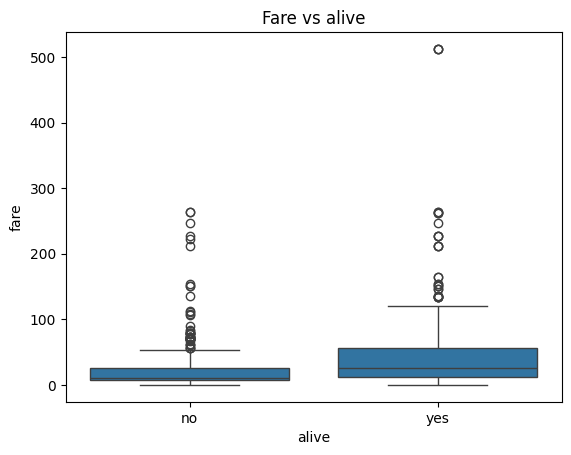

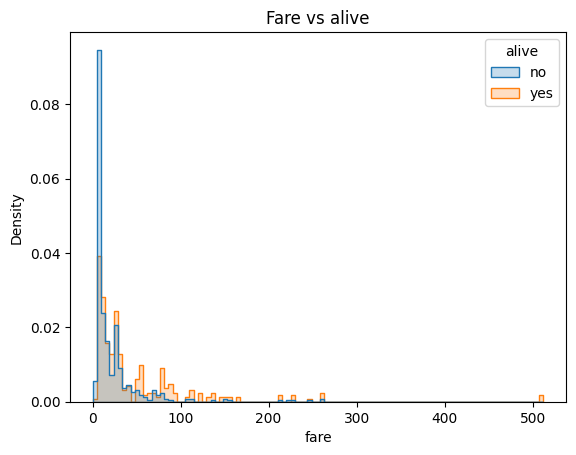

T-test para fare y alive: t-stat=7.939191660871055, p-value=6.120189341924198e-15


In [36]:
# 4. ¿Qué relación hay entre el precio del pasaje y la supervivencia/fallecimiento?

# Boxplot para fare vs survival
sns.boxplot(x='alive', y='fare', data=df_titanic_clean)
plt.title('Fare vs alive')
plt.show()

# Histplot para fare vs survival
sns.histplot(data=df_titanic_clean, x='fare', hue='alive', element='step', stat='density', common_norm=False)
plt.title('Fare vs alive')
plt.show()

# Test de t para ver si hay relación entre las variables "fare" y "alive" 

fare_survived = df_titanic_clean[df_titanic_clean['alive'] == 'yes']['fare']
fare_not_survived = df_titanic_clean[df_titanic_clean['alive'] == 'no']['fare']
t_stat, p_val = ttest_ind(fare_survived, fare_not_survived, nan_policy='omit')
print(f"T-test para fare y alive: t-stat={t_stat}, p-value={p_val}")

**Al observar los gráficos, se puede observar que la mayoría de las personas que pagaron más (lo más probable es que eran dde primea clase) sobrevieron, lo que confirma la relación entre la clase en la que se viajaba y la supervivencia**


**Al aplicar test de chi-cuadrada, se determina que 'alive' tiene una relación estadísticamente significativa con lo que se pagó**

In [37]:
# 5. Existen pasajero que no pagaron el billete, ¿podrías explicar por qué? ¿Qué ocurrió con la persona que más dinero se dejó?

# Pasajeros que no pagaron el boleto
no_fare_passengers = df_titanic_clean[df_titanic_clean['fare'] == 0]
print(no_fare_passengers)

# Pasajero que más dinero pagó
max_fare_passenger = df_titanic_clean[df_titanic_clean['fare'] == df_titanic_clean['fare'].max()]
print(max_fare_passenger)


      sex        age  fare   class  who  adult_male  embark_town alive  alone  \
179  male  36.000000   0.0   Third  man        True  Southampton    no   True   
263  male  40.000000   0.0   First  man        True  Southampton    no   True   
271  male  25.000000   0.0   Third  man        True  Southampton   yes   True   
277  male  33.173123   0.0  Second  man        True  Southampton    no   True   
302  male  19.000000   0.0   Third  man        True  Southampton    no   True   
413  male  33.173123   0.0  Second  man        True  Southampton    no   True   
466  male  33.173123   0.0  Second  man        True  Southampton    no   True   
481  male  33.173123   0.0  Second  man        True  Southampton    no   True   
597  male  49.000000   0.0   Third  man        True  Southampton    no   True   
633  male  33.173123   0.0   First  man        True  Southampton    no   True   
674  male  33.173123   0.0  Second  man        True  Southampton    no   True   
732  male  33.173123   0.0  

**Aquellos que no pagaron boleto, vienen de Southampton, lugar donde inició ruta el Titanic, y todos eran hombres adultos sin acompañantes, por lo tanto se puede asegurar que eran miembros de la tripulación**

**Las personas que pagaron más por boleto sobrevivieron yeran de primera clase**

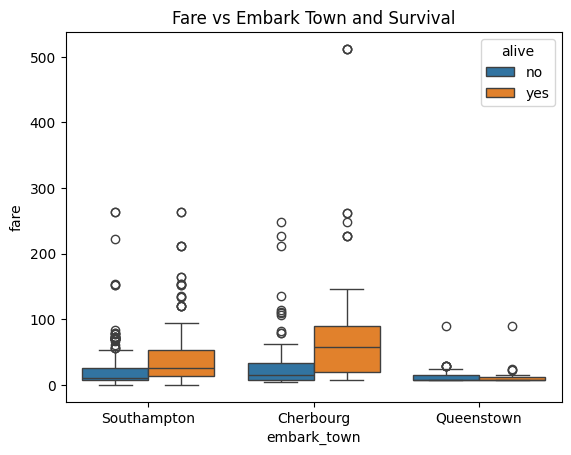

In [27]:
# 6. Existe alguna relación entre el dinero pagado, la ciudad de embarque y la supervivencia/fallecimiento.
# No necesitas aplicar ningún test, muestralo numérica o visualmente.

# Boxplot para fare vs embark_town y survival
sns.boxplot(x='embark_town', y='fare', hue='alive', data=df_titanic_clean)
plt.title('Fare vs Embark Town and Survival')
plt.show()


**Por lo que muestra la gráfica, para Southampton y Cherbourg hay una relación entre las tres variables, es decir, aquellos que pagaron más sobrevieron. En el caso de Queenstown no se aprecia dicha relación**

In [ ]:
def tricategorical_analysis(df, directora, otras, relativa = False, muestra_valores = False):
    col_directora = directora
    col_1 = otras[0]
    col_2 = otras[1]
    diccionario_multivariante = {}
    for valor in df[col_directora].unique():
        diccionario_multivariante[valor] = df.loc[df[col_directora] == valor,[col_2,col_1]] 
    for valor,df_datos in diccionario_multivariante.items():
        print(f"Respuesta {valor}:")
        plot_categorical_relationship_fin(df_datos,col_2,col_1, relative_freq= relativa, show_values= muestra_valores)

alive              no  yes
class  age_range          
First  0-12         1    3
       13-18        1   11
       19-35       32   64
       36-60       35   55
       61-80       11    3
Second 0-12         0   17
       13-18        6    6
       19-35       60   45
       36-60       29   18
       61-80        2    1
Third  0-12        28   20
       13-18       33   13
       19-35      254   80
       36-60       53    5
       61-80        4    1


C:\Users\PC ELITE\AppData\Local\Temp\ipykernel_31664\49966763.py:8: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  class_age_survival_counts = df_titanic_clean.groupby(['class', 'age_range', 'alive']).size().unstack().fillna(0)


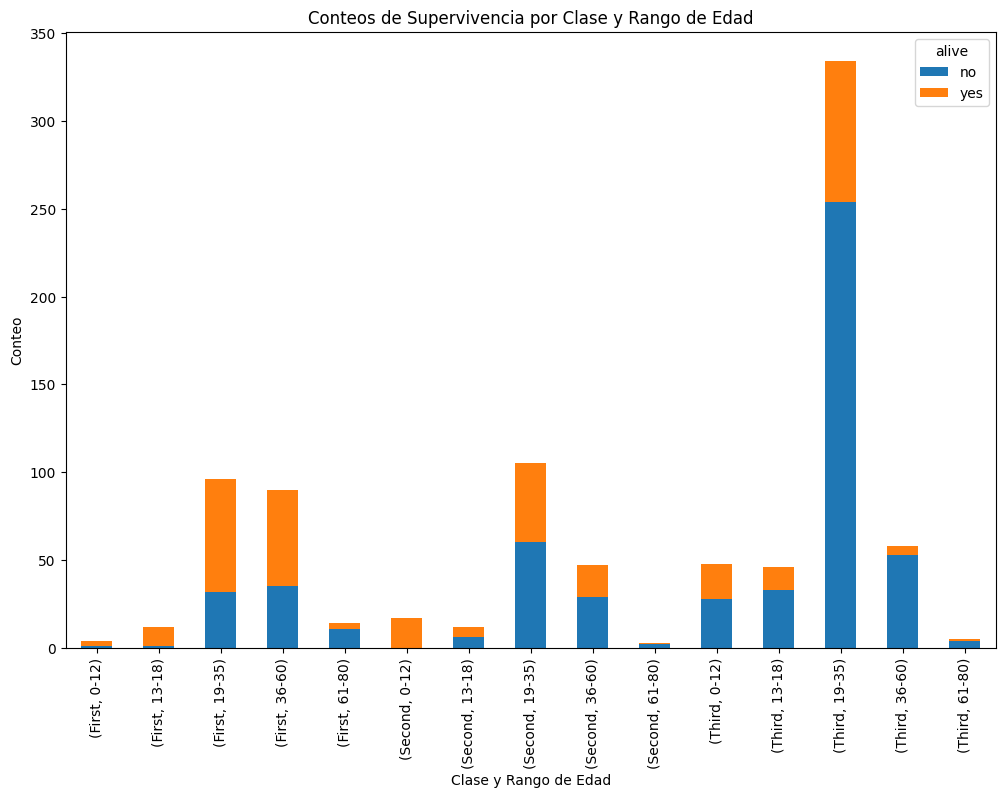


 alive                   no       yes
class  age_range                    
First  0-12       0.250000  0.750000
       13-18      0.083333  0.916667
       19-35      0.333333  0.666667
       36-60      0.388889  0.611111
       61-80      0.785714  0.214286
Second 0-12       0.000000  1.000000
       13-18      0.500000  0.500000
       19-35      0.571429  0.428571
       36-60      0.617021  0.382979
       61-80      0.666667  0.333333
Third  0-12       0.583333  0.416667
       13-18      0.717391  0.282609
       19-35      0.760479  0.239521
       36-60      0.913793  0.086207
       61-80      0.800000  0.200000


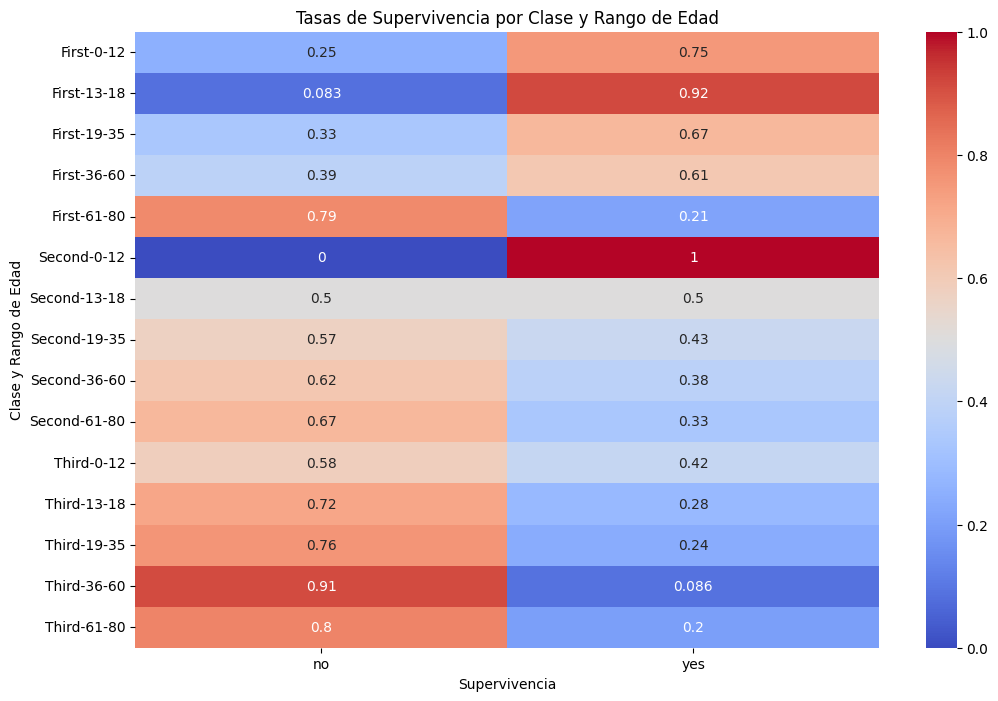

In [43]:
# 7. Ahondando en la relación entre sobrevivir o fallecer, la clase en la que se viajó y la edad de los pasajeros.
# ¿Qué agrupación de las dos variables (clase y edad) sobrevivió más en términos absolutos y en términos relativos?

# Crear una nueva columna para agrupar las edades en rangos
df_titanic_clean['age_range'] = pd.cut(df_titanic_clean['age'], bins=[0, 12, 18, 35, 60, 80], labels=['0-12', '13-18', '19-35', '36-60', '61-80'])

# Absolutos
class_age_survival_counts = df_titanic_clean.groupby(['class', 'age_range', 'alive']).size().unstack().fillna(0)
print(class_age_survival_counts)

# Gráfico de barras para los conteos absolutos
class_age_survival_counts.plot(kind='bar', stacked=True, figsize=(12, 8))
plt.title('Conteos de Supervivencia por Clase y Rango de Edad')
plt.xlabel('Clase y Rango de Edad')
plt.ylabel('Conteo')
plt.show()

# Relativos
class_age_survival_rates = class_age_survival_counts.div(class_age_survival_counts.sum(axis=1), axis=0)
print('\n', class_age_survival_rates)

# Heatmap para las tasas relativas
plt.figure(figsize=(12, 8))
sns.heatmap(class_age_survival_rates, annot=True, cmap='coolwarm', cbar=True)
plt.title('Tasas de Supervivencia por Clase y Rango de Edad')
plt.xlabel('Supervivencia')
plt.ylabel('Clase y Rango de Edad')
plt.show()


**Con valores absolutos, las personas entre 19 y 35 años de tercera clase que sobrevivieron fueron más; pero en términos relativos sobrevivieron todos los niños menores de 13 años.**

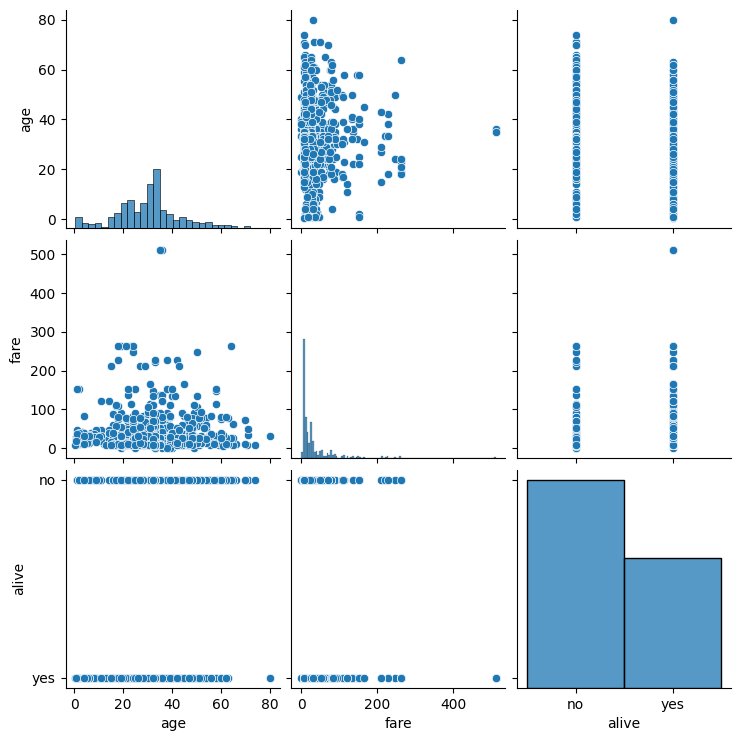

In [47]:
# 8. Finalmente, muestra las posibles relaciones entre edad, coste del billete y supervivencia/fallecimiento.
# ¿Qué puedes decir al respecto?

# Pairplot for age, fare, and survival
sns.pairplot(df_titanic_clean, vars=['age', 'fare', 'alive'])
plt.show()

**En estos gráficos, se puede notar que la mayoría de los pasajeros pagaron menos de 200 libras por boleto; hubo gente de todas  las edades que no sobrevivió; y, cómo se  mencionó antes, los que pagaron más fueron los que más sobrevivieron.**

## #2 Viajes

El objetivo en este caso no es tanto hacer un montón de análisis sino de completar lo que quedó pendiente en el workout y de entender cómo de un dataset podemos obtener preguntas o hipótesis interesantes (si las hay)

### #2.1 

Carga el dataset de viajes del mes de junio. Repite el análisis bivariante entre las variables "Aircompany" e "Ingresos", mostrando previamente los viajes por compañía aérea. ¿Qué situación llamativa nos surgió? (Ten en cuenta que somos el departamenteo de DataScience de TabarAir)

In [48]:
df_viajes = pd.read_csv('./data/dataset_viajes_jun23.csv')
df_viajes.head()

,aircompany,origen,destino,distancia,avion,con_escala,consumo_kg,duracion,ingresos,id_vuelo,mes
0,Airnar,París,Ginebra,411,Boeing 737,False,1028.691900,51,14232.65,Air_PaGi_10737,Jun23
1,FlyQ,Bali,Roma,12738,Boeing 737,True,33479.132544,1167,468527.19,Fly_BaRo_10737,Jun23
2,TabarAir,Ginebra,Los Angeles,9103,Airbus A380,False,109439.907200,626,584789.19,Tab_GiLo_11380,Jun23
3,MoldaviAir,París,Cincinnati,6370,Boeing 737,False,17027.010000,503,233342.51,Mol_PaCi_10737,Jun23
4,TabarAir,Cincinnati,Roma,7480,Boeing 747,False,86115.744000,518,438535.07,Tab_CiRo_10747,Jun23


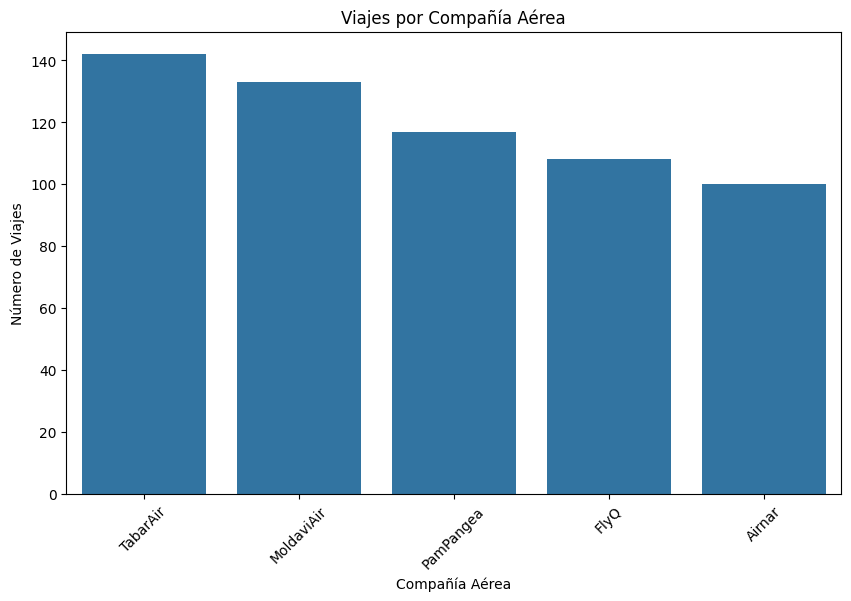

In [55]:
# Mostrar los viajes por compañía aérea
viajes_por_compania = df_viajes['aircompany'].value_counts()

plt.figure(figsize=(10, 6))
sns.barplot(x=viajes_por_compania.index, y=viajes_por_compania.values)
plt.title('Viajes por Compañía Aérea')
plt.xlabel('Compañía Aérea')
plt.ylabel('Número de Viajes')
plt.xticks(rotation=45)
plt.show()

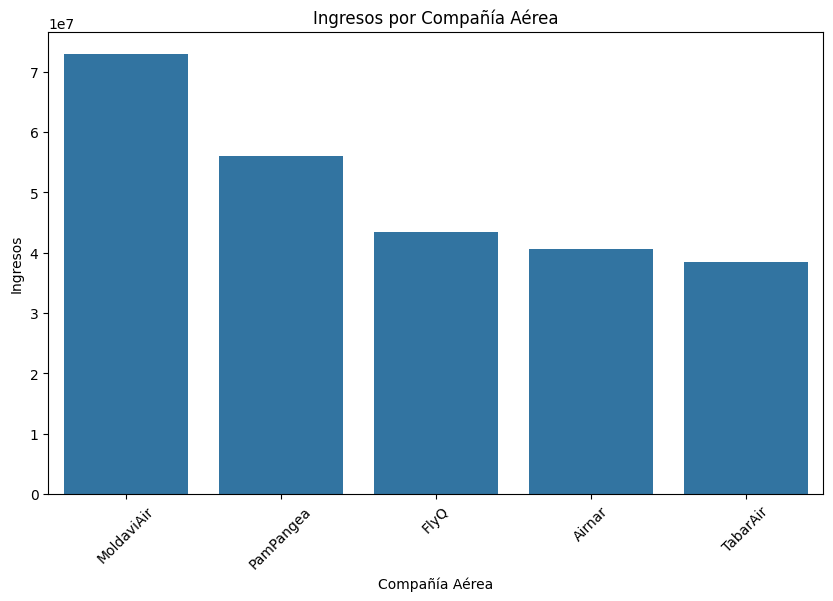

In [56]:
# Análisis bivariante entre "Aircompany" e "Ingresos"
ingresos_por_compania = df_viajes.groupby('aircompany')['ingresos'].sum().sort_values(ascending=False)
plt.figure(figsize=(10, 6))
sns.barplot(x=ingresos_por_compania.index, y=ingresos_por_compania.values)
plt.title('Ingresos por Compañía Aérea')
plt.xlabel('Compañía Aérea')
plt.ylabel('Ingresos')
plt.xticks(rotation=45)
plt.show()

**TabarAir tiene muy  pocos ingresos, y eso que tiene el mayor número de vuelos registrados.**

### #2.2

Repite el análisis multivariante entre "ingresos","distancias" y "consumo_kg". ¿Qué veíamos que parecía también muy prometedor?

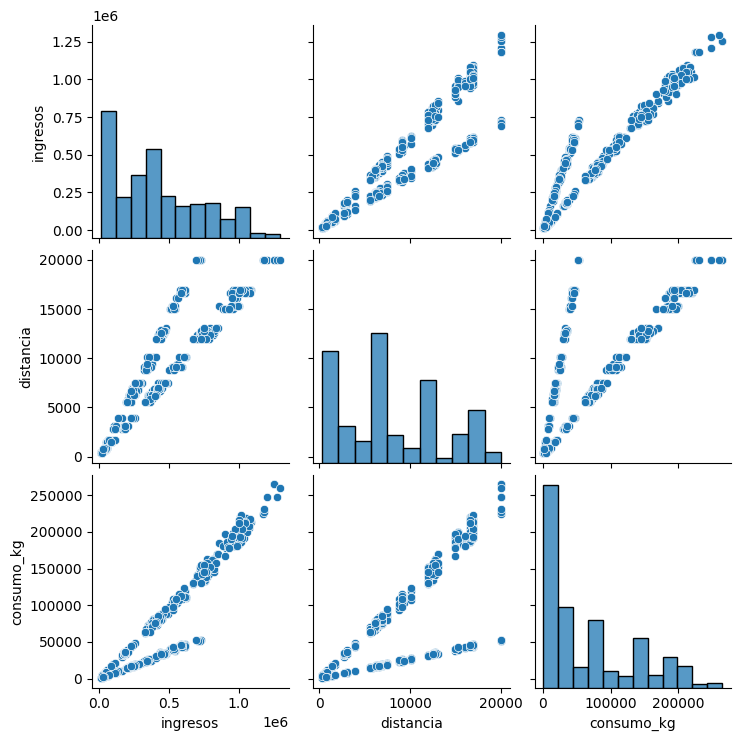

In [ ]:
# Analisis multivariante entre "ingresos", "distancias" y "consumo_kg"
sns.pairplot(df_viajes, vars=['ingresos', 'distancia', 'consumo_kg'])
plt.show()

**Hay una correlación entre la distancia y el consumo, para cada compañia**

### #2.3

Crea una variable categorica "cat_vuelo" a partir de distancias, escoge los rangos de las categorías basándote en la distribución de valores de "distancia" (sugerencia entre 3 y 4 categorías). Extra: Reaiza ahora otra vez el análisis multivariante "cat_vuelo", "ingresos", "consumo_kg". ¿Ves algo diferente?

In [57]:
# Crear una variable categórica "cat_vuelo" a partir de distancias
df_viajes['cat_vuelo'] = pd.cut(df_viajes['distancia'], bins=[0, 3000, 7000, 12000, np.inf], labels=['Corto', 'Medio', 'Largo', 'Muy Largo'])

# Mostrar la distribución de la nueva variable categórica
print(df_viajes['cat_vuelo'].value_counts())


cat_vuelo
Muy Largo    184
Medio        180
Corto        146
Largo         90
Name: count, dtype: int64


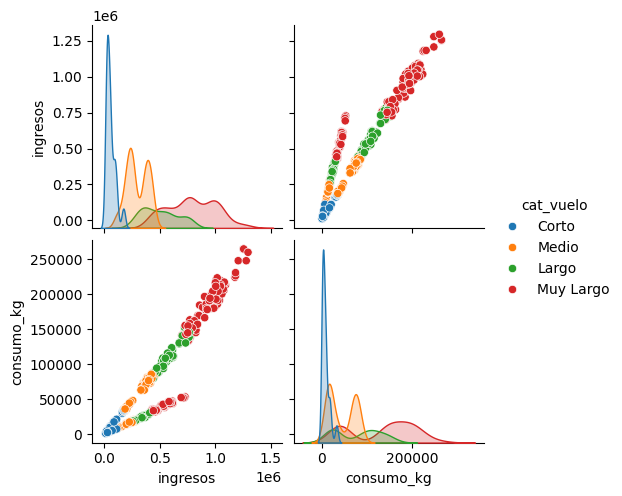

In [61]:
# Análisis multivariante entre "cat_vuelo", "ingresos", "consumo_kg"
sns.pairplot(df_viajes, vars=['ingresos', 'consumo_kg'], hue='cat_vuelo')
plt.show()

**Los viajes más largos son los que tienen mayor consumo (obviamente ) pero también son los que tienen mayor ingreso, probablemente por el alto precio del vuelo. Se pueden notar ods "rectas", de  las cualkes se ve ese comportamiento y puede que sean dos por la clase de cada vuelo o el precio que ofrece cada aerolínea**

### Extra:

#1 Consejos para encontrar "objetivos":

Si partes de un dataset que te parece interesante pero sin pregruntras claras, haz como hicimos con el dataset de Aviones. Describe, prioriza a ojo tus variables, realiza un análisis univariante completo, realiza un análisis bivariante ente las parejas de variables que te parecieron más intereantes. Llegados a este punto si el dataset tiene riqueza informativa, algo diferente tiene que haber aparecido (otra cosa es que sea interesante para ti :-)).  

Fíjate en lo que encontramos en el dataset de viajes: la empresa de más vuelos es la que menos ingresos tiene o la existencia clara de una línea de vuelos más eficientes en consumo que otros y otra de mayor ingresos por consumo. Lo siguiente es explorar esos puntos normalmente intentando contestar a: ¿por qué pasa?¿dónde,cuándo o cómo pasa?  

Busca esas "notas discordantes" en tu dataset, ya de por sí son mensajes del análisis. Ordénalas por importancia (importancia = impactan en ingresos, impactan en la calidad de la vida de las personas, impactan en el coste y poco más hay) e intenta entender por qué suceden esas notas discordantes, cómo solucionarlas o aprovecharlas y ya tienes objeetivos para el EDA; incluso si no encuentras respuesta siempre tendras esas notas discordantes, la conclusión de que no se puede avanzar con los datos que se tienen y los próximos pasos de encontrar más información para explicar lo que ocurre.

#2 Contestando a las preguntas de "Viajes".

- Necesitamos identificar esas líneas eficientes, para ello crea una variable que mida el ingreso por kilogramo consumido y otra que mida el kilogramo consumido por kilómetro. Haz el análisis univariante de las mismas intentando encontrar una diferencia clara entre viajes eficientes y no eficientes (que sabemos que existe). Fija un umbral para indicar si un viaje es supereficiente o si no lo es
- Crea esa variable de eficiencia binaria de eficiencia.
- Ahora haz el análisis bivariante de esa eficiencia y las compañías aéreas (queremos ver si realmente eso explica la situación de TabarAir). 
- Para nota: Hacer los análisis multivariante por compañía, eficiencia, tipo de avión y compañía, eficiencia, destino e incluso el de compañía, eficiencia, origen, destino.
- Con todo ello deberías poder encontrar si hay respuesta a la situación de TabarAir además de poder mostrar otros datos interesantes.